<a href="https://colab.research.google.com/github/ayushipradhan30/AIML-mini-projects/blob/main/Neural_Network_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Input
from keras import optimizers
print('TensorFlow Version: ', tf.__version__)
import os

TensorFlow Version:  2.17.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/My Drive/train'

archive.zip  SVHN_single_grey1.h5  test_32x32.mat  train_32x32.mat


In [4]:
file_path = '/content/drive/My Drive/train/SVHN_single_grey1.h5'
hdf = h5py.File(file_path, 'r')
hdf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [5]:
x_train = hdf['X_train']
x_test = hdf['X_test']
x_val = hdf['X_val']
y_train = hdf['y_train']
y_test = hdf['y_test']
y_val = hdf['y_val']

In [6]:
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (42000, 32, 32)
y_train:  (42000,)
x_val:  (60000, 32, 32)
y_val:  (60000,)
x_test:  (18000, 32, 32)
y_test:  (18000,)


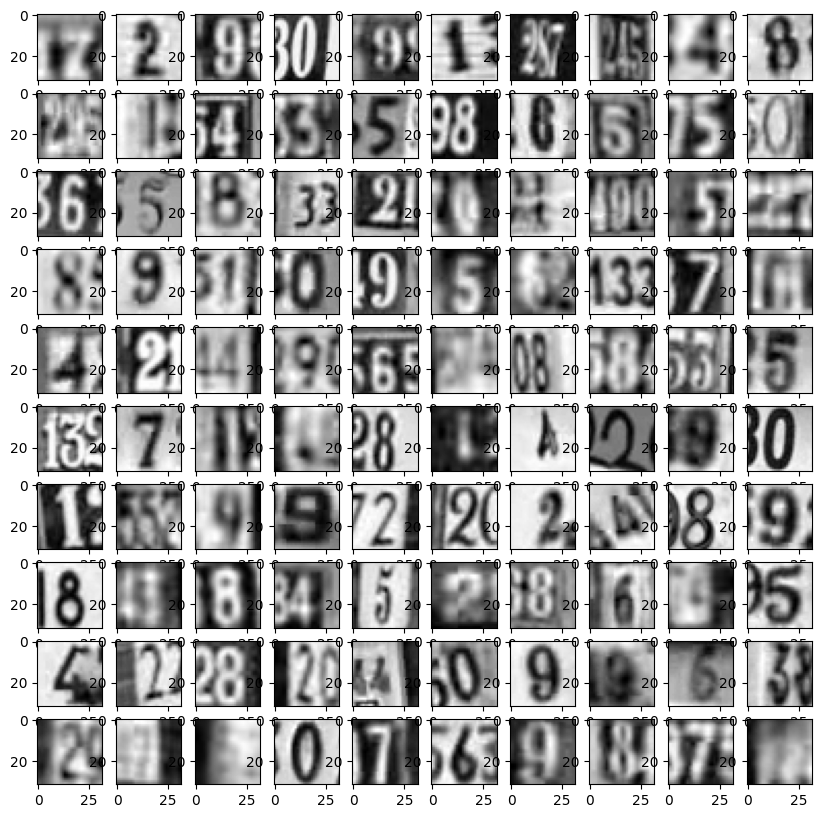

In [7]:
fig = plt.figure(figsize = (10,10))
cols = 10
rows = 10
for i in range(1, cols * rows + 1):
  img = x_test[i]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img, cmap = 'gray')
plt.show()

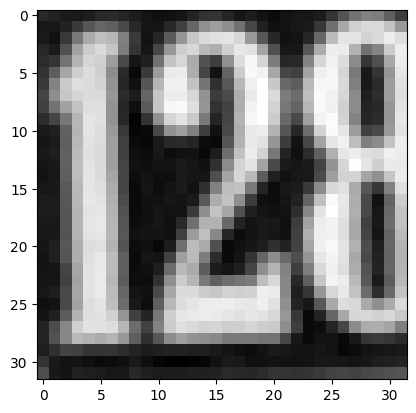

label:  2


In [8]:
plt.imshow(x_train[0], cmap = 'gray')
plt.show()
print("label: ", y_train[0])

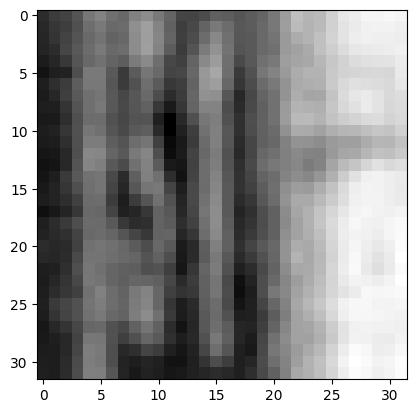

label:  1


In [9]:
plt.imshow(x_test[0], cmap = 'gray')
plt.show()
print("label: ", y_test[0])

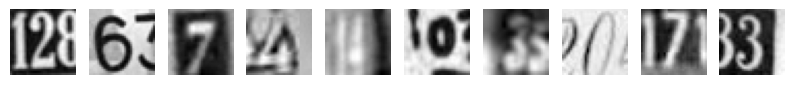

Labels for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
plt.figure(figsize = (10,1))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(x_train[i].reshape(32,32), cmap = 'gray', )
  plt.axis('off')
plt.show()
print('Labels for each of the above image: %s' %(y_train[0:10]))

## Implementing an optimal K-Nearest Neighbour Classifier

In [11]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)


In [12]:
x_train = np.asarray(x_train).reshape(42000, 1024)
x_test = np.asarray(x_test).reshape(18000, 1024)
x_val = np.asarray(x_val).reshape(60000, 1024)

In [13]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_val = x_val.astype('float32') / 255

In [15]:
neighbors = list(range(1, 30, 2))

In [19]:
acc_score = []

for i in neighbors:
  knn = KNeighborsClassifier()
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  scores = accuracy_score(y_test, y_pred)
  acc_score.append(scores)

MSE = [1 - x for x in acc_score]

optimal_k = neighbors[MSE.index(min(MSE))]
print(optimal_k)

1


In [20]:
knn = KNeighborsClassifier(n_jobs = -1, n_neighbors=optimal_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('\nClassification Metric Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("\nAccuracy Score: \n", accuracy_score(y_test, y_pred))


Classification Metric Report:
               precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

    accuracy                           0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000


Confusion Matrix:
 [[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  22

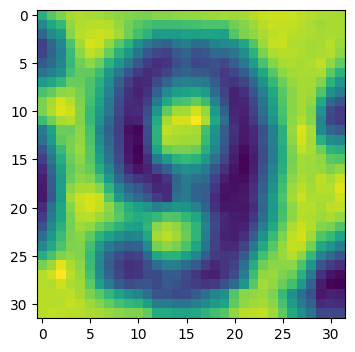

Label: 
 [9]


In [21]:
plt.figure(figsize = (4,4))
plt.imshow(x_test[70].reshape(32,32))
plt.show()
image = x_test[70]
print("Label: \n", knn.predict(image.reshape(1, -1)))

Implementing Deep Neural Network

In [22]:
x_train = np.asarray(x_train).reshape(42000, 1024)
x_test = np.asarray(x_test).reshape(18000, 1024)
x_val = np.asarray(x_val).reshape(60000, 1024)

In [23]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [24]:
print("y_train:\n", y_train[0:5])
print("y_test:\n", y_test[0:5])
print("y_val:\n", y_val[0:5])

y_train:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
y_test:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
y_val:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


Implementing Neural Network

In [26]:
#Initialize the Artificial Neural Network Classifier
keras_models = Sequential()

In [27]:
#Input Layer with 512 nodes
keras_models.add(Dense (512, kernel_initializer='he_normal', input_shape = (1024,)))
#Activation Function
keras_models.add(Activation('relu'))

#Hidden Layer 1
keras_models.add(Dense(256, kernel_initializer='he_normal'))
keras_models.add(Activation('relu'))

#Hidden Layer 2
keras_models.add(Dense(128, kernel_initializer='he_normal'))
keras_models.add(Activation('relu'))

#Hidden Layer 3
keras_models.add(Dense(64, kernel_initializer='he_normal'))
keras_models.add(Activation('relu'))

#Hidden Layer 4
keras_models.add(Dense(32, kernel_initializer='he_normal'))
keras_models.add(Activation('relu'))

#Output Layer with 10 nodes
keras_models.add(Dense(10))
#Here, we are using softmax function because we have multiclass classsification
keras_models.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
keras_models.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 699,690 (2.67 MB)

 Trainable params: 699,690 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
keras_models.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
history = keras_models.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.1268 - loss: 2.2973 - val_accuracy: 0.1877 - val_loss: 2.2563
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.2032 - loss: 2.2421 - val_accuracy: 0.2395 - val_loss: 2.1982
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2568 - loss: 2.1734 - val_accuracy: 0.2069 - val_loss: 2.1670
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.3099 - loss: 2.0635 - val_accuracy: 0.3278 - val_loss: 1.9866
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.3540 - loss: 1.9320 - val_accuracy: 0.3548 - val_loss: 1.8672
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.3928 - loss: 1.7997 - val_accuracy: 0.4564 - val_loss: 1.6729
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.4298 - loss: 1.6860 - val_accuracy: 0.4604 - val_loss: 1.6023
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.4638 - loss: 1.6072 - val_a

In [32]:
results = keras_models.evaluate(x_val, y_val)
print(results[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6448 - loss: 1.1342
0.6542999744415283


In [33]:
keras_models.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
history = keras_models.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.4288 - loss: 1.8760 - val_accuracy: 0.6211 - val_loss: 1.1918
Epoch 2/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.6263 - loss: 1.1827 - val_accuracy: 0.6852 - val_loss: 1.0220
Epoch 3/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.6761 - loss: 1.0477 - val_accuracy: 0.7062 - val_loss: 0.9430
Epoch 4/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7006 - loss: 0.9546 - val_accuracy: 0.6933 - val_loss: 0.9588
Epoch 5/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.7180 - loss: 0.9129 - val_accuracy: 0.7459 - val_loss: 0.8250
Epoch 6/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.7391 - loss: 0.8451 - val_accuracy: 0.7386 - val_loss: 0.8376
Epoch 7/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.7451 - loss: 0.8172 - val_accuracy: 0.7328 - val_loss: 0.8383
Epoch 8/20
210/210 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.7630 - loss: 0.7632 - va

In [35]:
results = keras_models.evaluate(x_val, y_val)
print(results[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8253 - loss: 0.5714
0.833216667175293
